# DATA 441 - Module 1 - Section 1


<font face="Chalkboard" color="darkgreen" size=10> Preliminaries and Intro to Locally Weighted Regression</font>

## Research in Data Science

<figure>
<center>
<img src='https://drive.google.com/uc?id=15TsarM26JuceHzAlpVJYdRMbzIyY2t7N' 
width='500px' />
<figcaption>Research Flowchart</figcaption></center>
</figure>

## Where can we find cleaner data ?


https://archive.ics.uci.edu/ml/datasets.php

https://www.kaggle.com/datasets


## Github Repositories

Create a portfolio for your data projects.

https://docs.github.com/en/pages/quickstart


## Regression

**Main Idea**: 
 - the output (dependent) variable is continuous and we want to "predict" its value within the range of the input features. (<font color='red'>WARNING: doing otherwise could lead to flawed inferences</font>).
 - there is "noise" which means that for essentially the same input values there may be different slightly different values of the output variable or there is "noise" in the measurement of all the variables.  
 - we assume that the noise (i.e. the errors in measurement) are following a normal distribution with mean 0 and some unknown standard deviation.

**Main Approach**: 
- we want to estimate the expected value of the dependent variable as a function of the input features. Thus we want to approximate a conditional expectation $\mathbb{E}(y|\text{input features})$ as a function of the input features such as $$\mathbb{E}(y|X) = f(X)$$

- we want to determine the simplest form of the function $f$ (principle of
parsimony) and we assume that $$y = f(X) + \sigma \epsilon$$ where $\epsilon$ is the "noise", in statistical terms, $\epsilon$ is independent and identically distributed, it follows a standard normal distribution and, $\sigma>0$ is generally unknown. 

## Linear Regression

**Main Idea**: Make predictions as a weighted combination of the input feauture values; the weights can be positive or negative. Expressed as an intuitive equation the idea is as follows:

$$\text{Predicted Value} = weight_1 \cdot \text{Feature}_1 + weight_2 \cdot \text{Feature}_2 + ... + weight_p \cdot \text{Feature}_p $$

<font color='darkred' size=4pt>Message: In Machine Learning the "machine" is learning the weights based on iterative processes. Typically, the updates are based on a gradient descent method for minimizing an objective function, such as the sum of squared errors.

## Linear Regression

The main idea of linear regression is the assumption that:

$$\large y = X\cdot\beta +\sigma\epsilon $$

**Important aspect**: linear regression can be seen as a linear combination of the observed outputs (values of the dependent variable).

We have:

$$\large  X^Ty = X^TX\beta +\sigma X^T\epsilon$$

We solve for $\beta$ (by assuming that $X^TX$ is invertible):

$$\large \beta = (X^TX)^{-1}(X^Ty) - \sigma (X^TX)^{-1}X^T\epsilon$$

We take the expected value of this equation and obtain the expected value of the coeffcients:

$$\large \bar{\beta} = (X^TX)^{-1}(X^Ty)$$

Therefore the predictions we make are:

$$\large \hat{y} = X(X^TX)^{-1}(X^Ty)$$

## Locally Weighted Regression

**Main Idea:** Trends and associations are generally nonlinear; however, *locally*, trends can be interpreted linearly.

In this context, local properties are relative to a metric. A metric is a method by which we compute the distance between two observations. Observations contain multiple features, and if they are numeric, we can see them as vectors in a finite-dimensional Euclidean space.

The independent observations are the rows of the matrix $X$. Each row has a number of columns (this is the number of features) and we can denote it by $p.$ As such, every row is a vector in $\mathbb{R}^p.$ The distance between two independent observations is the Euclidean distance between the two represented $p-$dimensional vectors. The equation is:

$$ dist(\vec{v},\vec{w})=\sqrt{(v_1-w_1)^2+(v_2-w_2)^2+...(v_p-w_p)^2}$$

We shall have $n$ different weight vectors because we have $n$ different observations.

## Visual Intuition

<figure>
<center>
<img src='https://drive.google.com/uc?id=1rWcjflTXOfPsuKa71dr_ruqgqklfcSO_' 
width='500px' />
<figcaption>Intuition for Locally Weighted Regression</figcaption></center>
</figure>

The message of this picture is that we are going to use kernels, such as Gaussian or similar shapes, for solving local linear regression problems.

In [ ]:
# this block of code imports graphical libraries for plotting graphs with high resolution
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

In [ ]:
# Libraries of functions need to be imported
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
from scipy import linalg

In [ ]:
cars = pd.read_csv("drive/My Drive/Colab Notebooks/mtcars.csv")

In [ ]:
cars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
cars.sort_values(by='wt')

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6


In [ ]:
y = cars['mpg'].values

In [ ]:
y

array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4])

In [ ]:
x = cars.loc[:,'cyl':'carb'].values

In [ ]:
# we check the dimensionality of X
x.shape

(32, 10)

In [ ]:
XTX = np.transpose(x).dot(x)

check if the $X^TX$ matrix is invertible

In [ ]:
np.linalg.inv(XTX).dot(np.transpose(X).dot(y))

array([ 0.35082641,  0.01354278, -0.02054767,  1.24158213, -3.8261315 ,
        1.19139689,  0.18972068,  2.8322223 ,  1.05426253, -0.26321386])

In [ ]:
# let's check
from sklearn.linear_model import LinearRegression

In [ ]:
model= LinearRegression(fit_intercept=False)

In [ ]:
model.fit(x,y)
model.coef_

array([ 0.35082641,  0.01354278, -0.02054767,  1.24158213, -3.8261315 ,
        1.19139689,  0.18972068,  2.8322223 ,  1.05426253, -0.26321386])

In [ ]:
cars = cars.sort_values(by='wt')

### This is he actual scatter plot connnecting weight and mileage

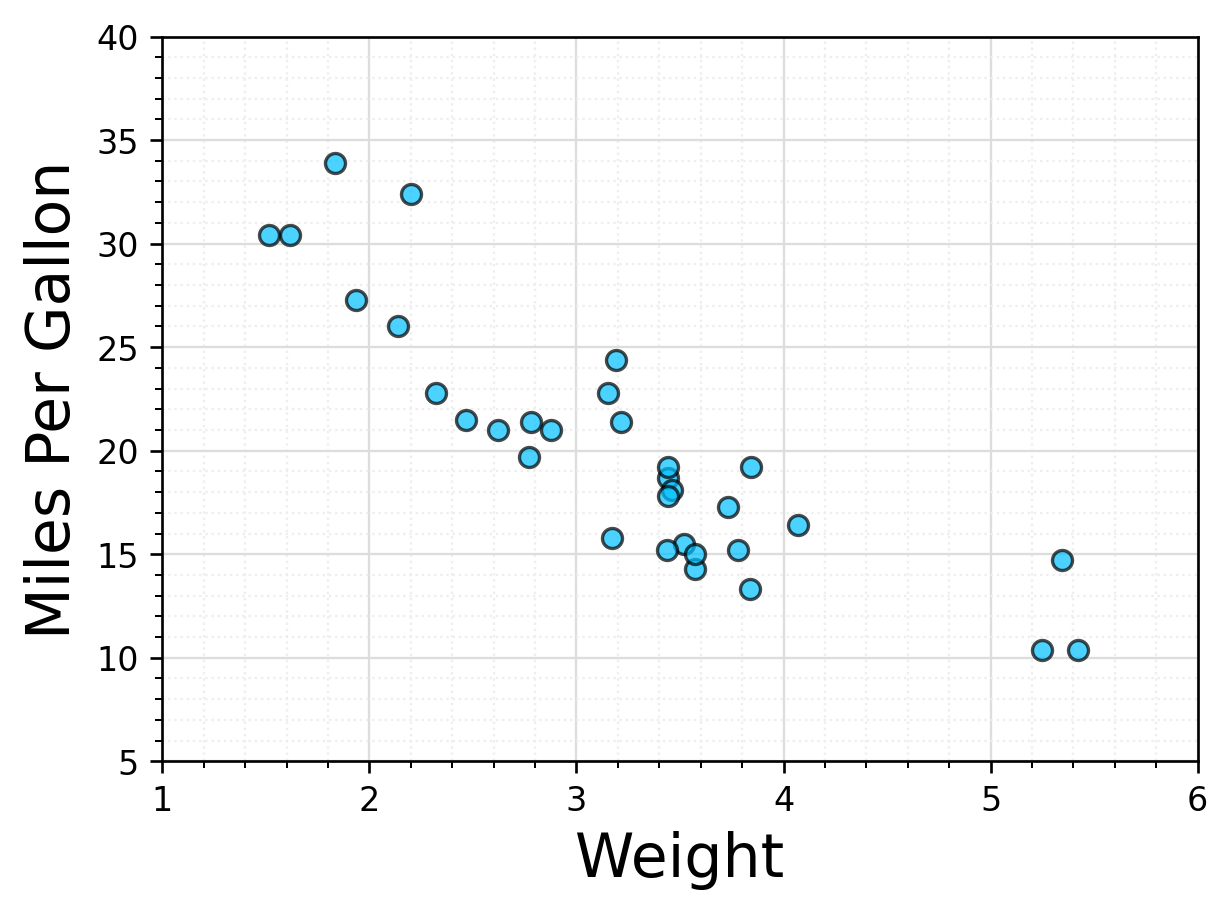

In [ ]:
# from matplotlib.figure import figaspect
fig, ax = plt.subplots(1,1)
ax.scatter(cars["wt"],cars["mpg"],color='deepskyblue',ec='k',alpha=0.7)
plt.xlabel('Weight',fontsize=18)
plt.ylabel('Miles Per Gallon',fontsize=18)
ax.grid()
plt.xlim(1,6)
plt.ylim(5,40)
ax.grid(which='major', color='#DDDDDD', linewidth=0.7)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)
ax.set_axisbelow(True)
plt.minorticks_on()
#we can set aspect ratio for the figure
ratio = 0.7
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
plt.savefig("mtcars.svg")

In [ ]:
x_range = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)

In [ ]:
x = cars["wt"].values
y = cars["mpg"].values
lm = linear_model.LinearRegression()
model = lm.fit(x.reshape(-1,1),y)
xhat = np.array([1.1,5.9]).reshape(-1,1)
yhat = lm.predict(xhat)

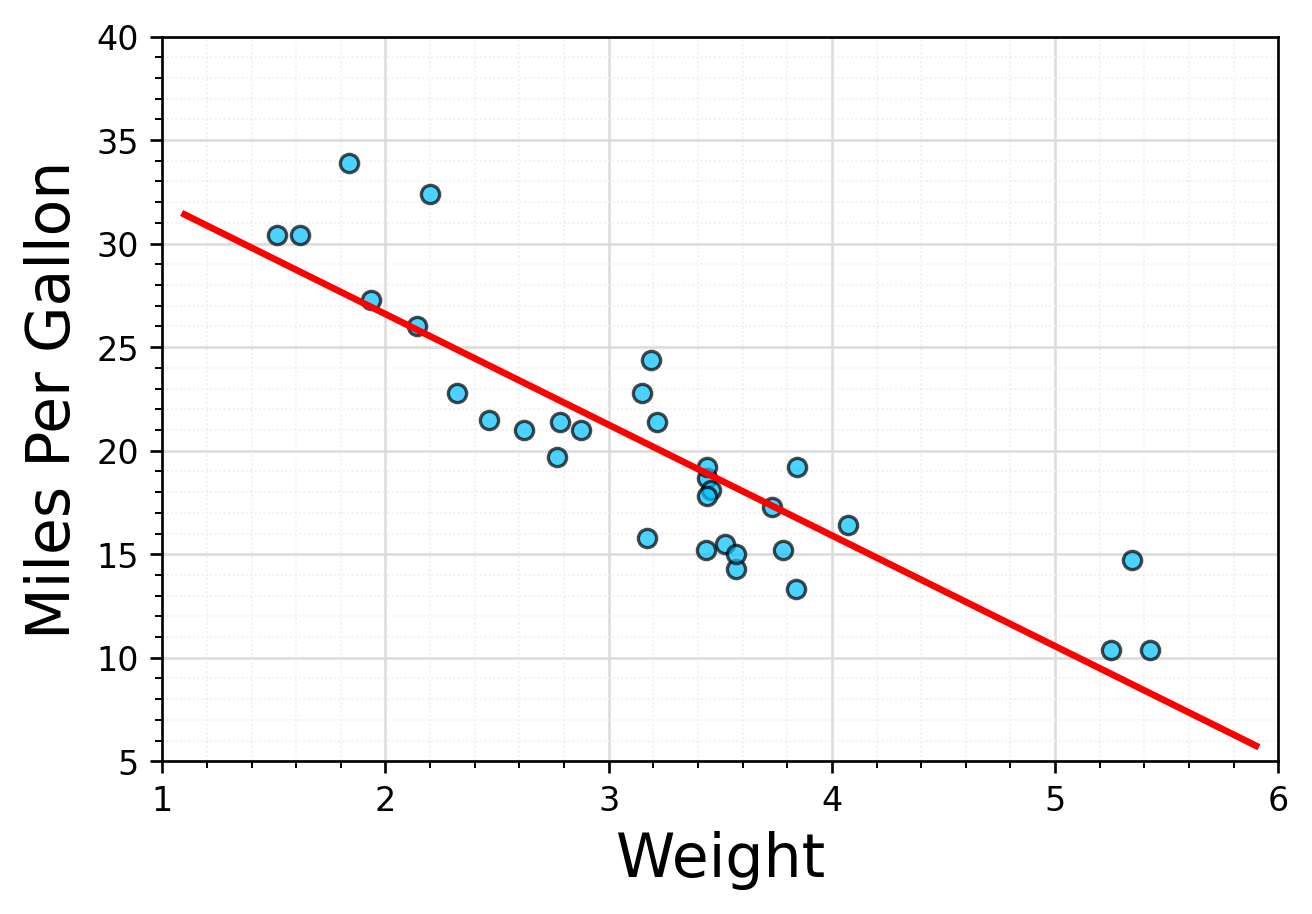

In [ ]:
fig, ax = plt.subplots(1,1)
plt.plot(xhat, yhat, '-',color='red',lw=2)
plt.scatter(cars["wt"],cars["mpg"],color='deepskyblue',ec='k',s=30,alpha=0.7)
plt.xlim(1,6)
plt.ylim(5,40)
plt.xlabel('Weight',fontsize=18)
plt.ylabel('Miles Per Gallon',fontsize=18)
ax.grid()
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.set_axisbelow(True)
plt.minorticks_on()
plt.savefig("mtcars_line.png")

In [ ]:
#Defining the bell shaped kernel function - used for plotting later on
def kernel_function(xi,x0,tau= .005): 
    return np.exp( - (xi - x0)**2/(2*tau))

In [ ]:
def weights_matrix(x,tau):
  n = len(x)
  return np.array([np.exp(- (x - x[i])**2/(2*tau)) for i in range(n)]) 

In [ ]:
w = weights_matrix(x,0.05)

In [ ]:
#@title
def lowess_bell_shape_kern1(x, y, tau = .005):
    """lowess_bell_shape_kern(x, y, tau = .005) -> the estimate of y denoted "yest"
    Locally weighted regression: fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The kernel function is the bell shaped function with parameter tau. Larger tau will result in a
    smoother curve. 
    """
    n = len(x)
    yest = np.zeros(n)

    #Initializing all weights from the bell shape kernel function    
    # here w is an nxn matrix
    w = weights_matrix(x,tau)    
    
    #Looping through all x-points
    for i in range(n):
        weights = w[:, i]
        b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
        A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])
        theta = linalg.solve(A, b)
        yest[i] = theta[0] + theta[1] * x[i] 

    return yest

In [ ]:
def lowess_bell_shape_kern(x, y, tau = .005):
    """lowess_bell_shape_kern(x, y, tau = .005) -> the estimate of y denoted "yest"
    Locally weighted regression: fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The kernel function is the bell shaped function with parameter tau. Larger tau will result in a
    smoother curve. 
    """
    n = len(x)
    yest = np.zeros(n)

    #Initializing all weights from the bell shape kernel function    
    # here w is an nxn matrix
    w = weights_matrix(x,tau)    
    
    #Looping through all x-points
    for i in range(n):
        weights = w[:, i]
        lm.fit(np.diag(w[:,i]).dot(x.reshape(-1,1)),np.diag(w[:,i]).dot(y.reshape(-1,1)))
        yest[i] = lm.predict(x[i].reshape(-1,1)) 

    return yest

In [ ]:
yhat = lowess_bell_shape_kern(x,y, tau= .03)

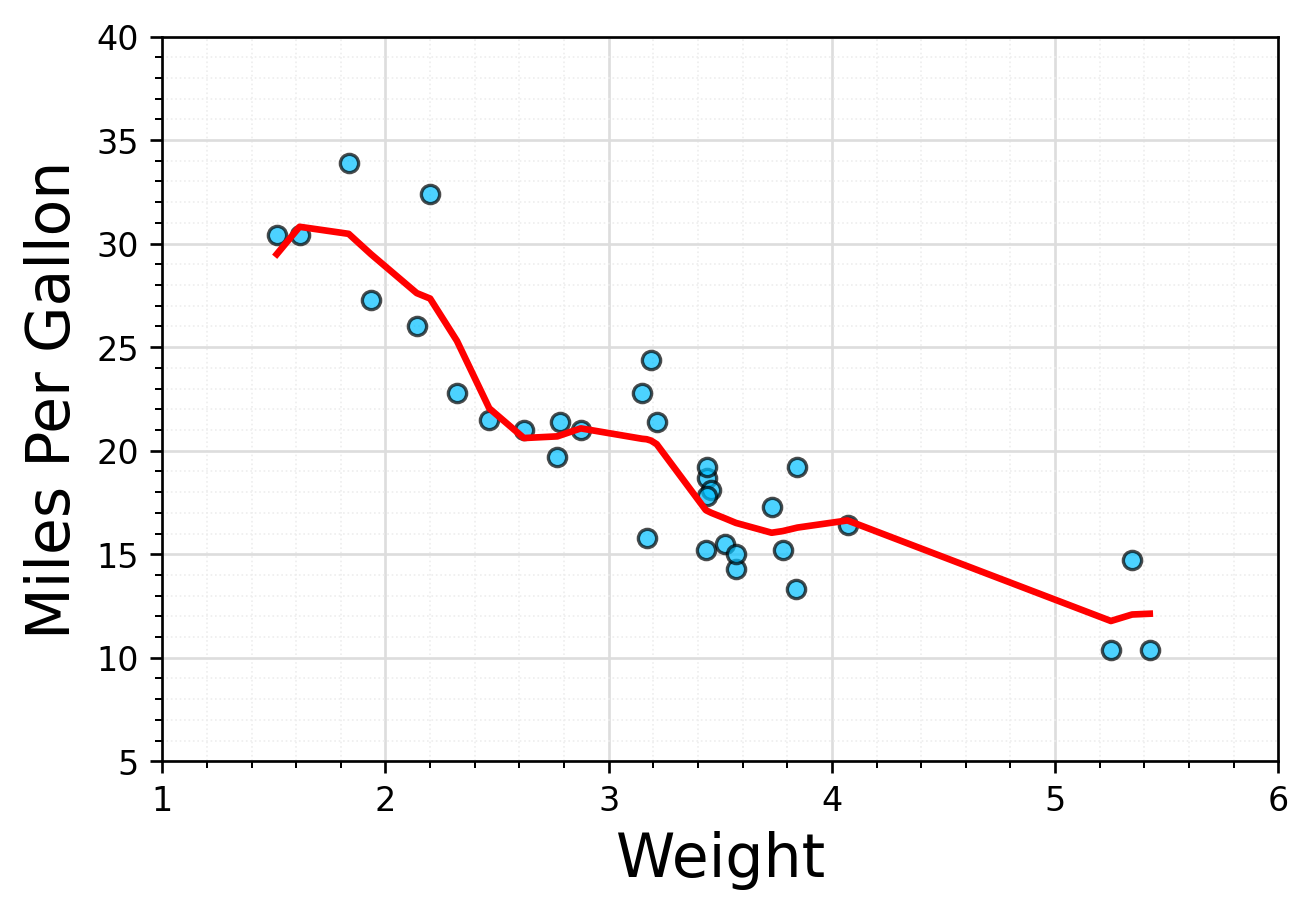

In [ ]:
fig, ax = plt.subplots(1,1)
plt.plot(x[np.argsort(x)], yhat[np.argsort(x)], '-',color='red',lw=2)
plt.scatter(cars["wt"],cars["mpg"],color='deepskyblue',ec='k',s=30,alpha=0.7)
plt.xlim(1,6)
plt.ylim(5,40)
plt.xlabel('Weight',fontsize=18)
plt.ylabel('Miles Per Gallon',fontsize=18)
ax.grid()
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.set_axisbelow(True)
plt.minorticks_on()
plt.savefig("mtcars_line.png")

Interpretation: we expect to see on average an 5.34mpg drop if the weight of the car increases by 1 ton.

## Loess from Statsmodels Library

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
lowess = sm.nonparametric.lowess

In [ ]:
x = np.random.uniform(low = -2*np.pi, high = 2*np.pi, size=500)
x = np.sort(x)
y = np.sin(x) + 0.5*np.random.normal(size=len(x))

In [ ]:
# we can apply our function defined earlier
yhat1 = lowess_bell_shape_kern(x,y,tau=0.25)

In [ ]:
yhat2 = lowess(y, x, frac= 1/6, return_sorted = False)

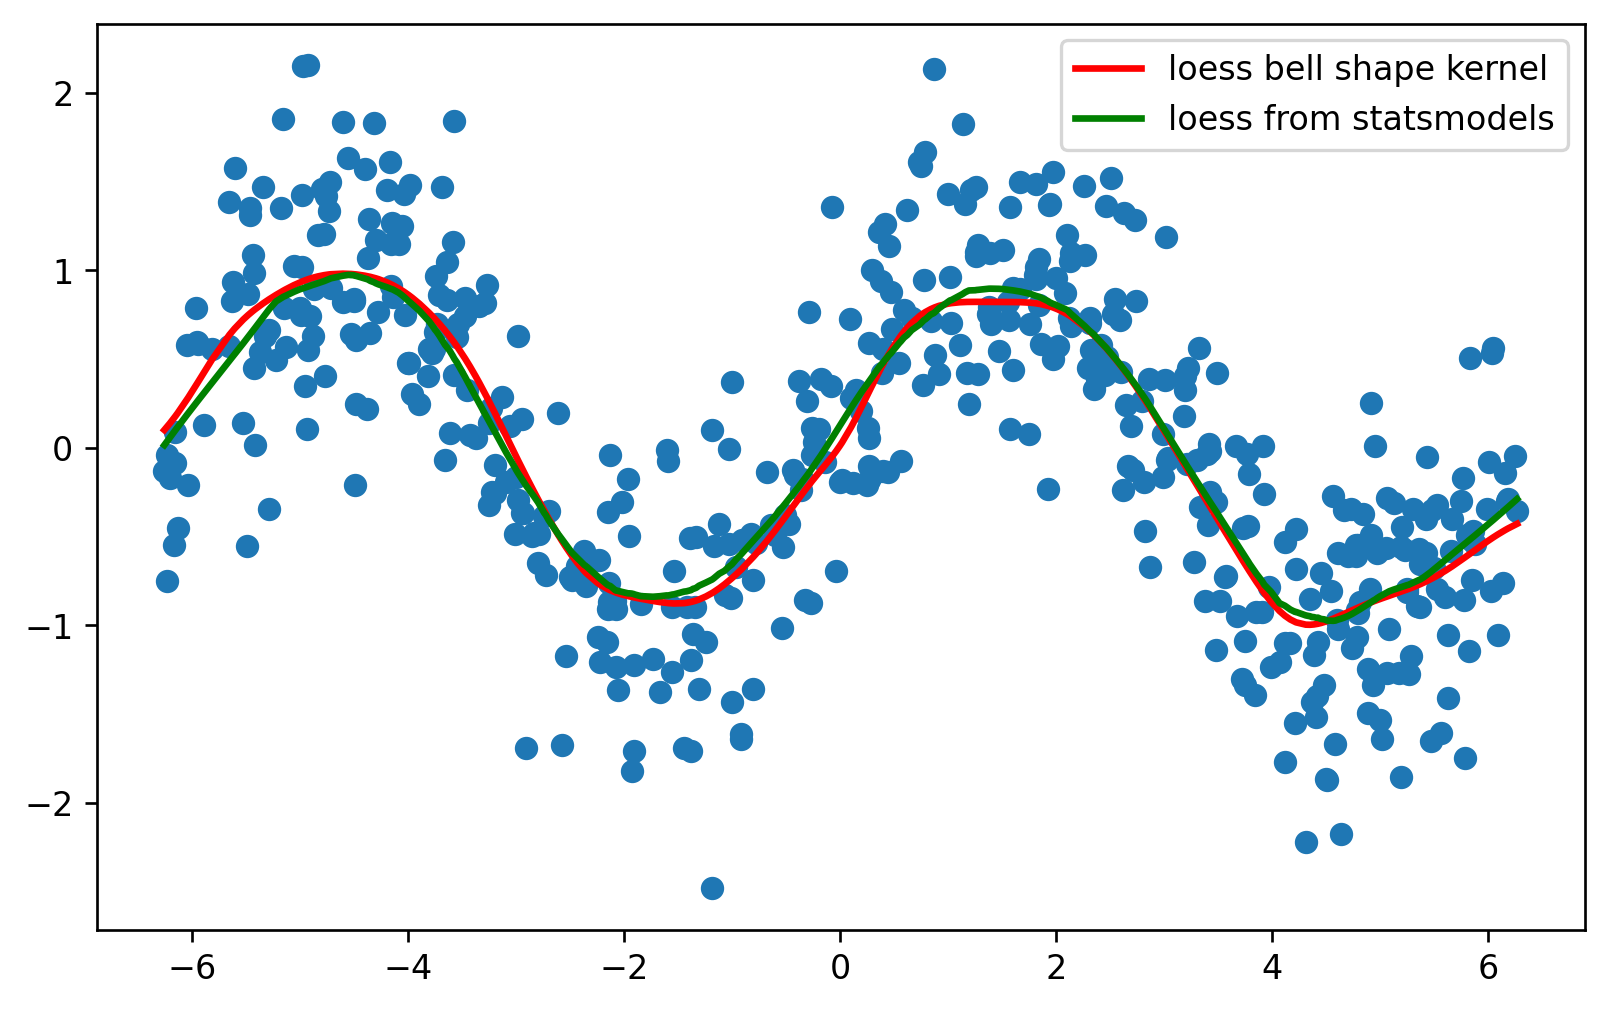

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.plot(x,yhat1,lw=2,color='red',label='loess bell shape kernel')
plt.plot(x,yhat2,lw=2,color='green',label='loess from statsmodels')
plt.legend()
plt.show()

In [ ]:
mse(yhat1,y), mse(yhat2,y)

(0.24668615652621165, 0.2498463408285521)

In [ ]:
# return to the car example
x = cars["wt"].values
y = cars["mpg"].values
y_sm = lowess(y,x,frac=1/3,it=10, return_sorted = False)

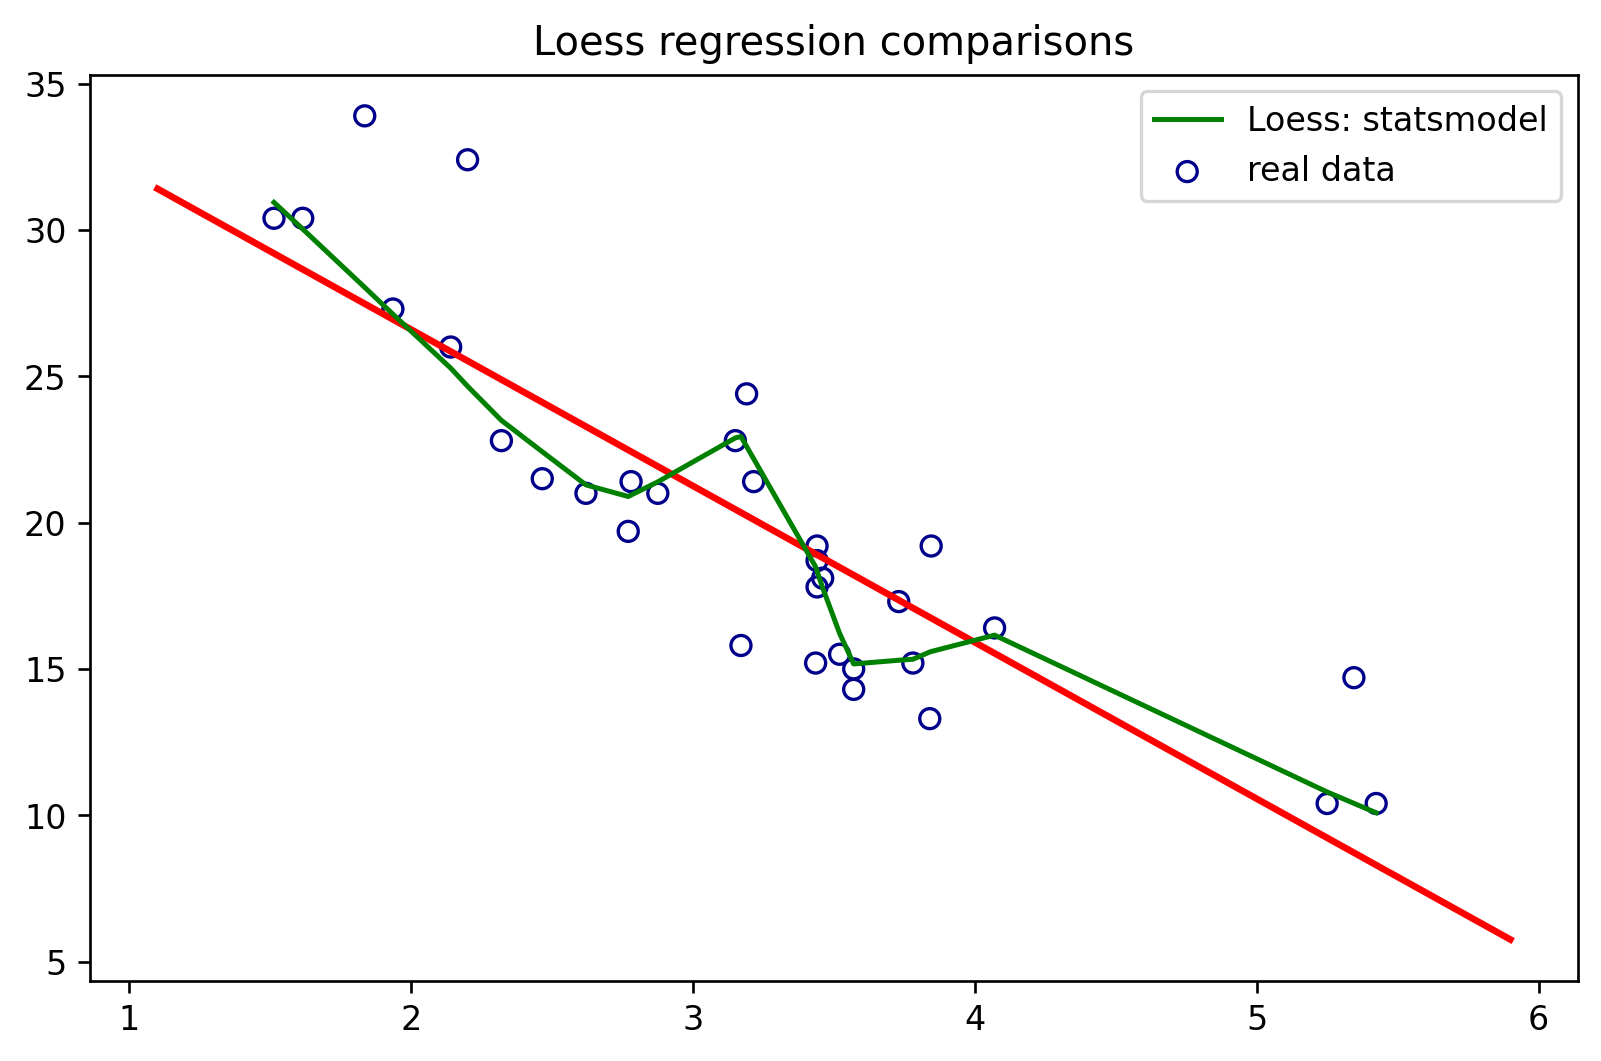

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x,y, facecolors = 'none', edgecolor = 'darkblue', label = 'real data')
plt.plot(xhat, yhat, '-',color='red',lw=2)
plt.plot(x,y_sm,color = 'green', label = 'Loess: statsmodel')
plt.legend()
plt.title('Loess regression comparisons')
plt.show()

### Locally Weighted Linear Regression (Loess)
https://xavierbourretsicotte.github.io/loess.html